In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


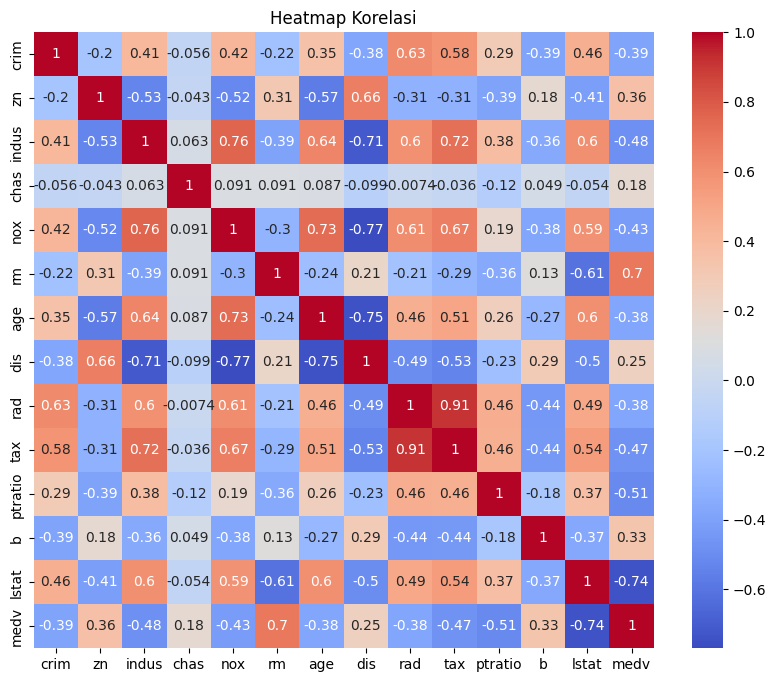

In [317]:
corr = df.corr()

# Heatmap korelasi
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()


# Koefisien Korelasi Pearson

Koefisien **korelasi Pearson** (\( r \)) adalah ukuran statistik yang digunakan untuk menentukan seberapa kuat dan arah hubungan linear antara dua variabel, \( x \) dan \( y \). Nilai \( r \) selalu berada dalam rentang \(-1\) hingga \(1\), di mana \( r = 1 \) menunjukkan korelasi positif sempurna, \( r = -1 \) menunjukkan korelasi negatif sempurna, dan \( r = 0 \) menunjukkan tidak adanya hubungan linear antara kedua variabel.

Secara matematis, koefisien korelasi Pearson dihitung dengan rumus berikut:

$$
r = \frac{\sum_{i=1}^{n} (x_i - x_bar) (y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Dalam rumus ini, \( x_i \) dan \( y_i \) adalah nilai individu dari masing-masing variabel, sedangkan \( bar x \) dan \( bar y \) adalah rata-rata dari masing-masing variabel. Pembilang dari rumus ini menghitung kovarians antara \( x \) dan \( y \), yang menunjukkan sejauh mana kedua variabel bergerak bersama. Penyebutnya adalah hasil kali dari simpangan baku \( x \) dan \( y \), yang digunakan untuk menormalisasi nilai korelasi sehingga tetap berada dalam rentang \(-1\) hingga \(1\).

Interpretasi nilai \( r \) adalah sebagai berikut:
- Jika \( r > 0 \), maka terdapat hubungan positif, di mana peningkatan \( x \) cenderung diikuti oleh peningkatan \( y \).
- Jika \( r < 0 \), maka terdapat hubungan negatif, di mana peningkatan \( x \) cenderung diikuti oleh penurunan \( y \).
- Jika \( r = 0 \), maka tidak ada hubungan linear yang signifikan antara kedua variabel.

Koefisien korelasi Pearson sering digunakan dalam analisis data, statistik, dan machine learning untuk mengukur hubungan antara variabel. Namun, penting untuk diingat bahwa korelasi tidak selalu menunjukkan hubungan sebab-akibat, melainkan hanya menggambarkan kekuatan dan arah hubungan linear antara variabel.


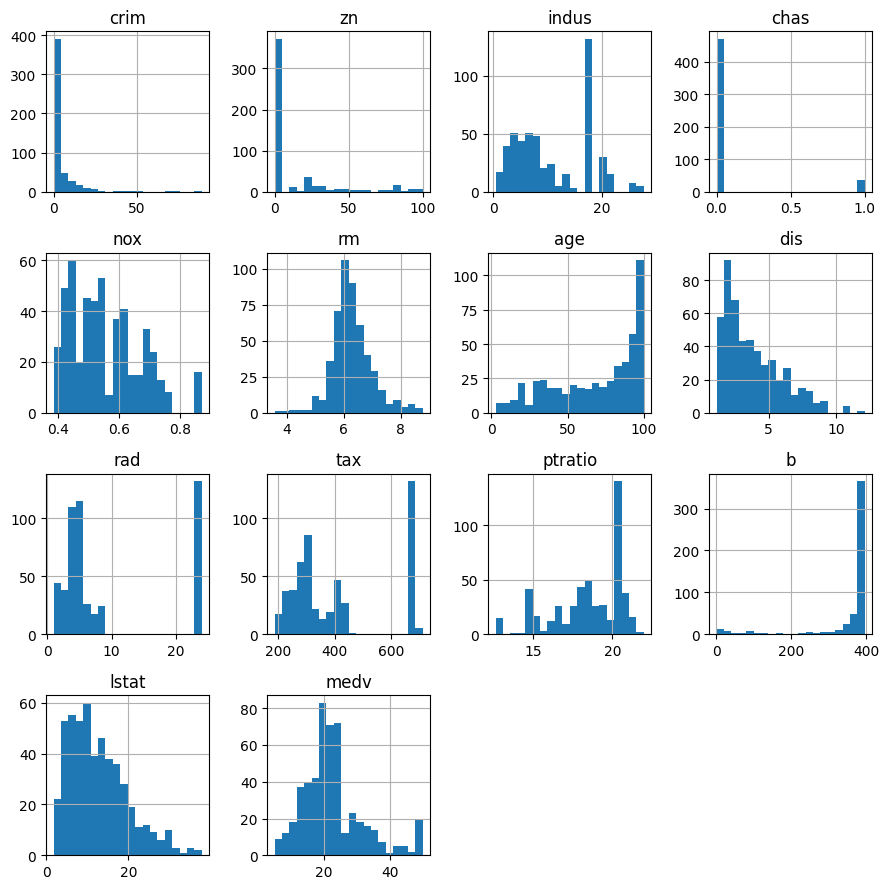

In [318]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

In [319]:
print("Skewness tiap fitur:")
print(df.skew())

Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


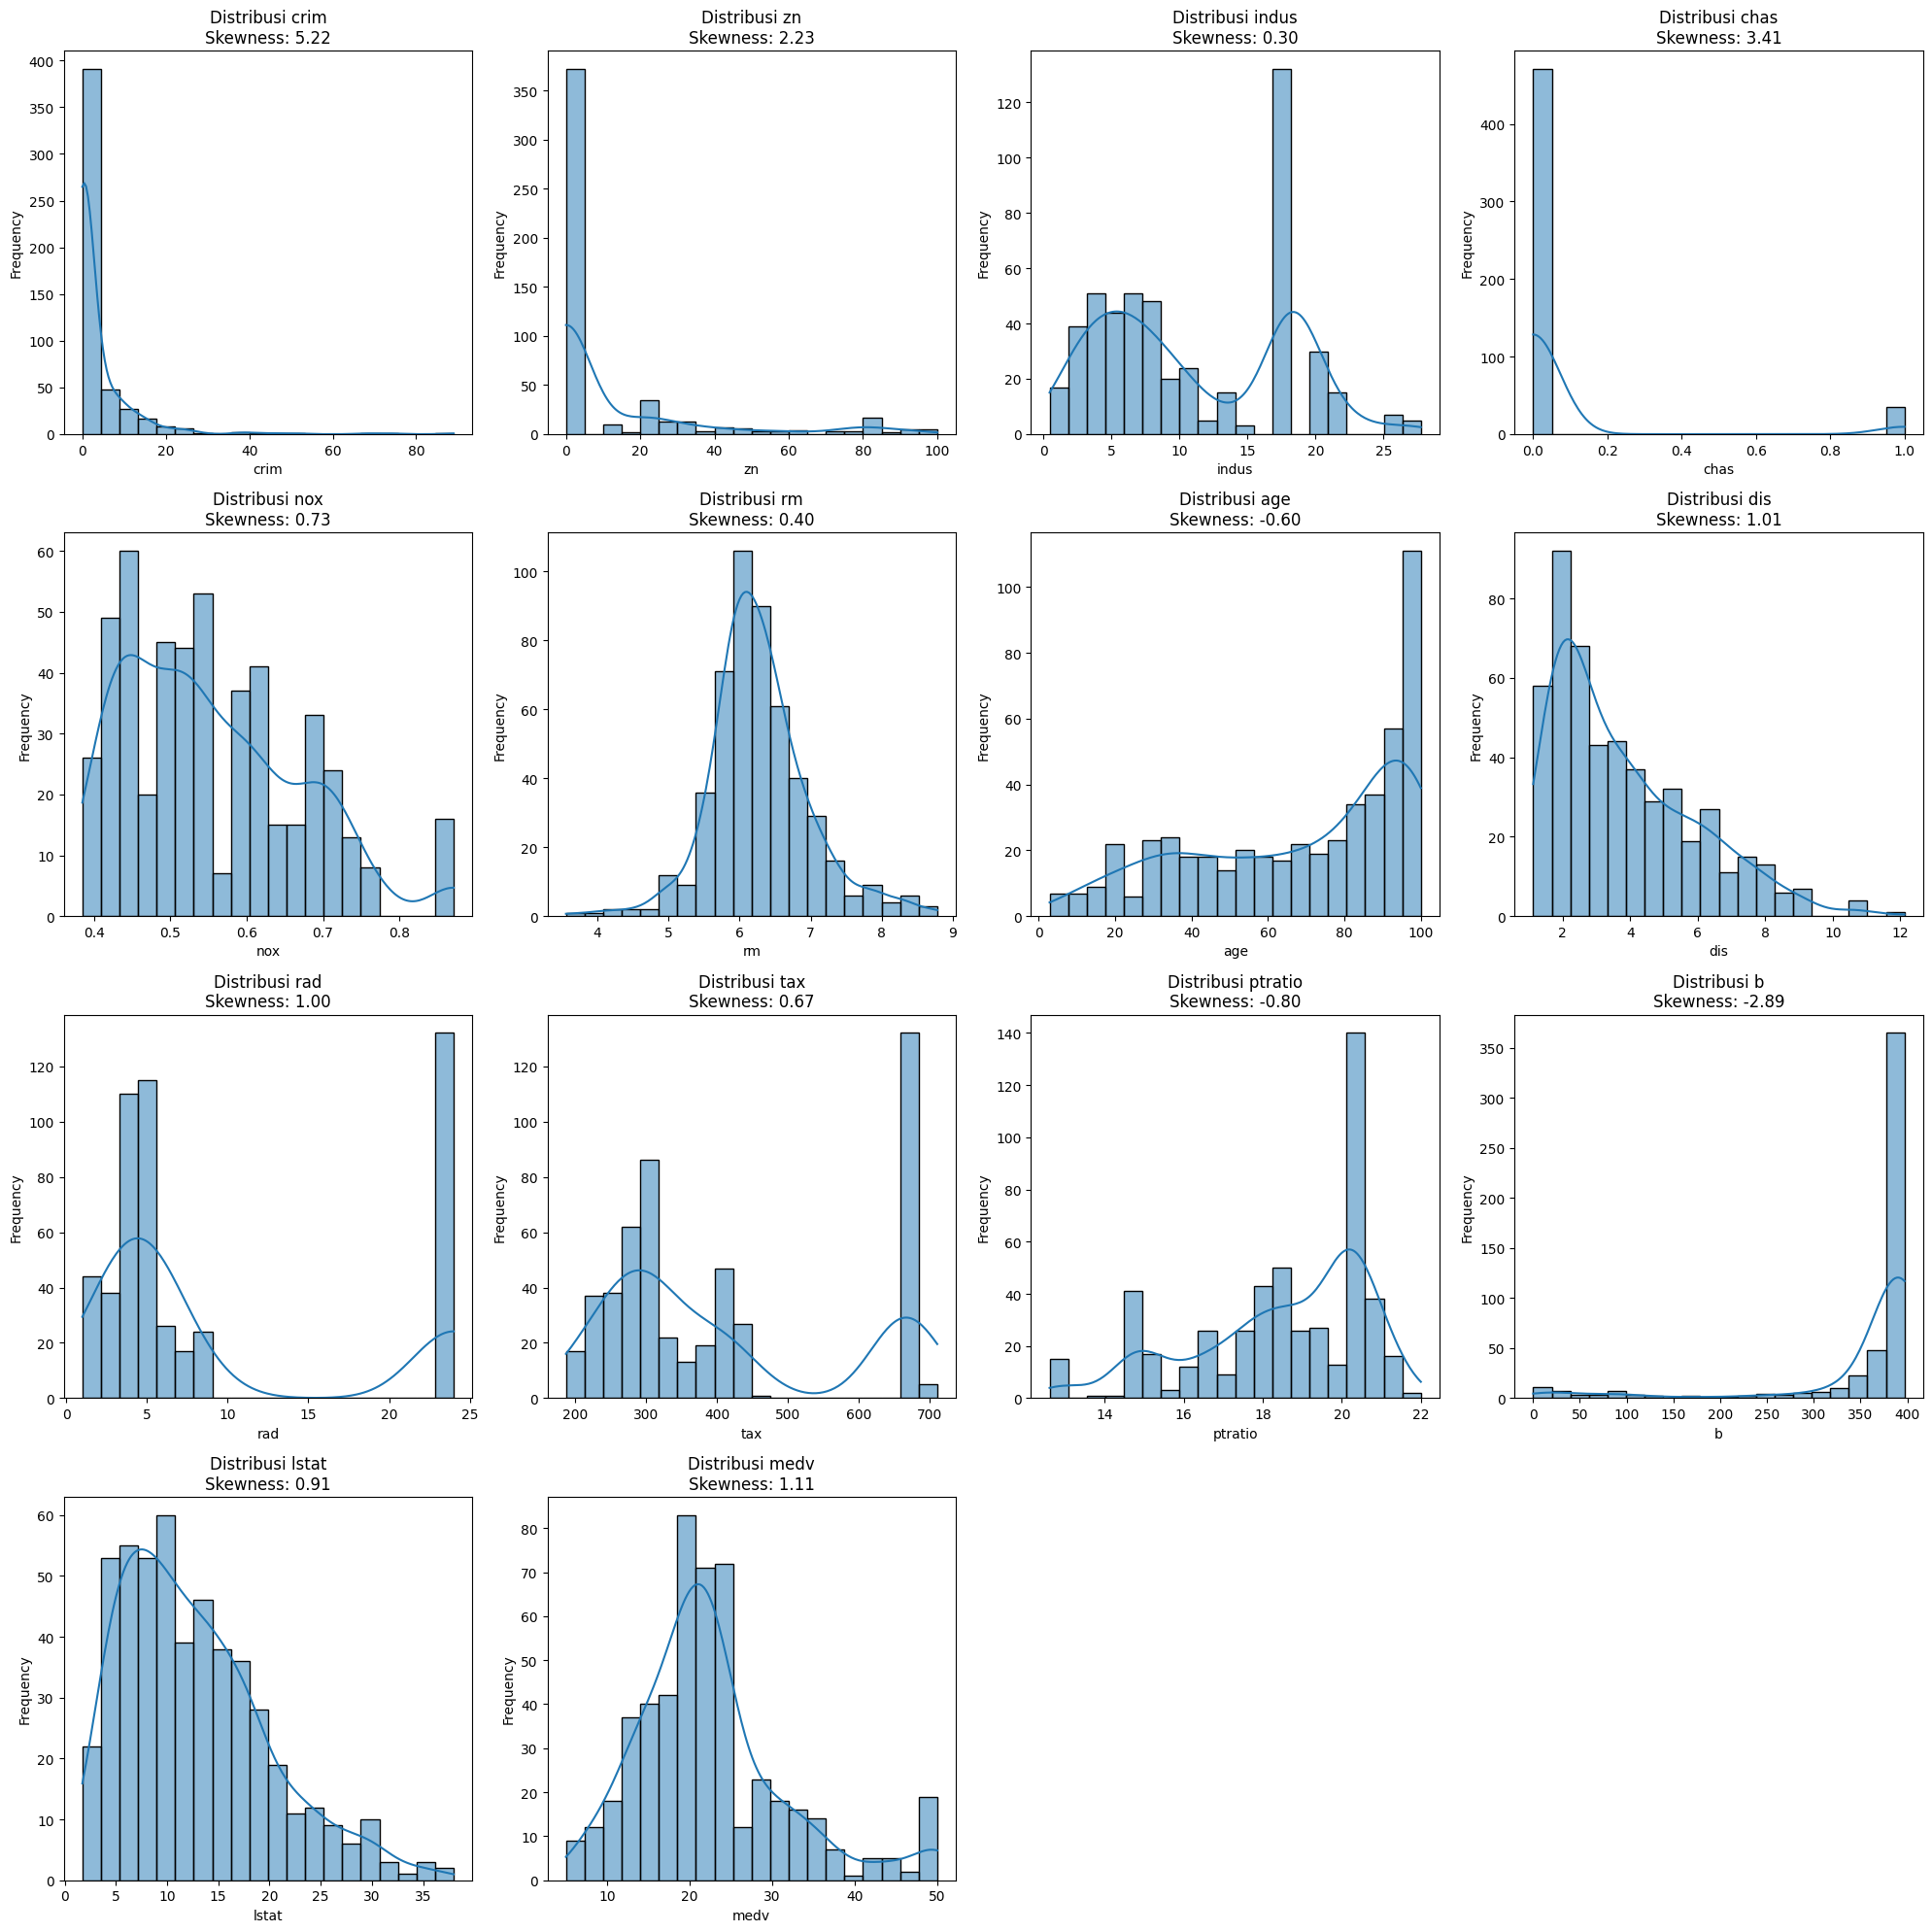

In [320]:
# Plotting skewness
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')
        
plt.tight_layout()
plt.show()


In [321]:
import numpy as np
from scipy.stats import yeojohnson

# Transformasi log untuk yang skew positif
df['crim_log'] = np.log1p(df['crim'])
df['zn_log'] = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])

# Transformasi Yeo-Johnson untuk yang skew negatif
df['b_yj'], _ = yeojohnson(df['b'])

# Print skewnewss sebelum transformasi
print("Skewness sebelum transformasi:")
print(df[['crim', 'zn', 'chas', 'b']].skew())

# Print skewness hasil transformasi
print("\nSkewness hasil transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())


Skewness sebelum transformasi:
crim    5.223149
zn      2.225666
chas    3.405904
b      -2.890374
dtype: float64

Skewness hasil transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


## Transformasi Yeo-Johnson

Transformasi Yeo-Johnson adalah fungsi bersyarat yang memperluas transformasi Box-Cox untuk menangani nilai positif dan negatif dari y. Transformasi ini didefinisikan berdasarkan tanda dari  y  dan nilai parameter lambda.

Berdasarkan kasus nilai y dan lambda, persamaaan yang digunakan berbeda. y merupakan nilai yang ingin diubah, bisa negatif, positif, atau nol. Lambda adalah parameter transformasi.

### **Kasus Penggunaan**

Transformasi Yeo-Johnson banyak digunakan untuk normalisasi data, terutama dalam pemodelan statistik dan pembelajaran mesin. Ini membantu menstabilkan varians dan membuat data yang miring lebih terdistribusi normal. Berbeda dengan transformasi Box-Cox, transformasi ini dapat menangani dataset dengan nilai positif dan negatif, menjadikannya lebih serbaguna untuk tugas pra-pemrosesan.

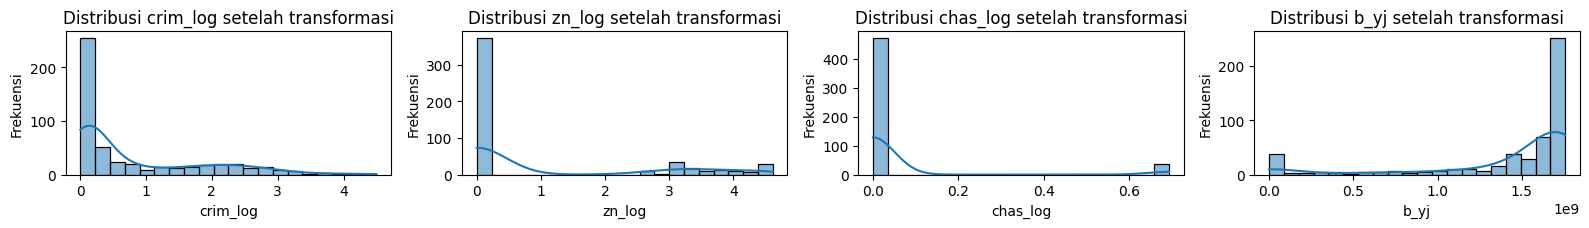

In [322]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

transformed_features = ['crim_log', 'zn_log', 'chas_log', 'b_yj']

for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')
    
for j in range(i + 1, 16):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


In [323]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim_log,zn_log,chas_log,b_yj
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.006300,2.944439,0.0,1.757991e+09
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.026944,0.000000,0.0,1.757991e+09
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.026924,0.000000,0.0,1.691012e+09
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.031857,0.000000,0.0,1.720398e+09
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.066770,0.000000,0.0,1.757991e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0.060747,0.000000,0.0,1.677425e+09
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0.044275,0.000000,0.0,1.757991e+09
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0.058986,0.000000,0.0,1.757991e+09
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0.103991,0.000000,0.0,1.701092e+09


In [324]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Replate fitur yang sudah di transformasi ke dalam dataframe
df_model = df.copy()
df_model['crim'] = df['crim_log']
df_model['zn'] = df['zn_log']
df_model['chas'] = df['chas_log']
df_model['b'] = df['b_yj']

df_model.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim_log,zn_log,chas_log,b_yj
0,0.006300,2.944439,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,1.757991e+09,4.98,24.0,0.006300,2.944439,0.0,1.757991e+09
1,0.026944,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,1.757991e+09,9.14,21.6,0.026944,0.000000,0.0,1.757991e+09
2,0.026924,0.000000,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,1.691012e+09,4.03,34.7,0.026924,0.000000,0.0,1.691012e+09
3,0.031857,0.000000,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,1.720398e+09,2.94,33.4,0.031857,0.000000,0.0,1.720398e+09
4,0.066770,0.000000,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,1.757991e+09,5.33,36.2,0.066770,0.000000,0.0,1.757991e+09


In [325]:
# Target medv
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [326]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.950581042460215


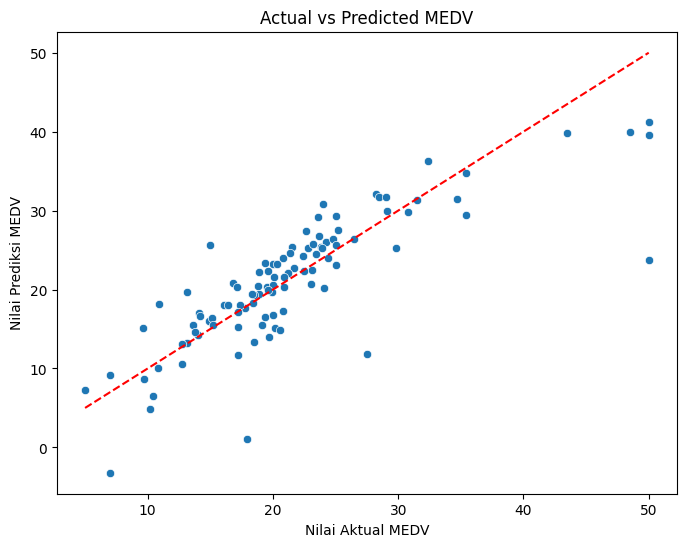

In [327]:
# Visualisasi prediksi vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

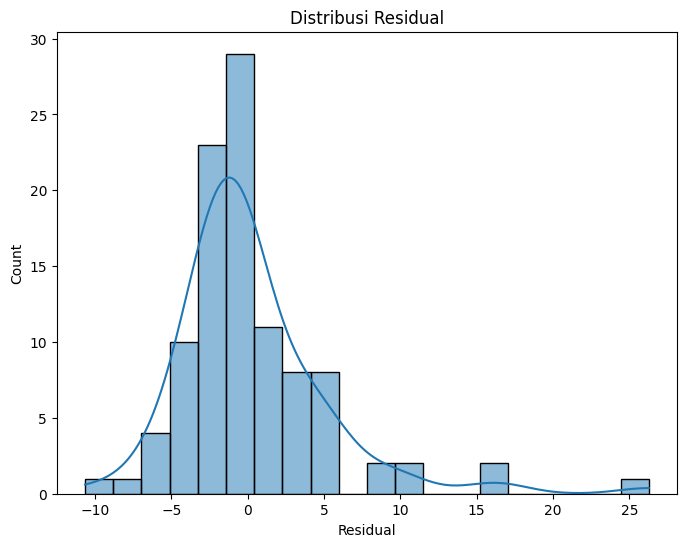

In [328]:
# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# Transformasi Data

#### Log Transform

In [329]:
# Log Transform
df['b_log'] = np.log1p(df['b'])

# Print skewnewss sebelum transformasi
print("Skewness sebelum transformasi:")
print(df[['crim', 'zn', 'chas', 'b']].skew())

# Print skewness hasil transformasi
print("\nSkewness hasil transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_log']].skew())


Skewness sebelum transformasi:
crim    5.223149
zn      2.225666
chas    3.405904
b      -2.890374
dtype: float64

Skewness hasil transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_log      -4.459061
dtype: float64


In [330]:
# Model
df_model = df.copy()
df_model['b'] = df['b_log']

X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_log', 'b_yj'], axis=1)
y = df_model['medv']

X


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,5.986201,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,5.986201,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,5.975919,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,5.980479,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.986201,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,5.973784,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,5.986201,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.986201,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,5.977492,6.48


In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 23.361407113448514


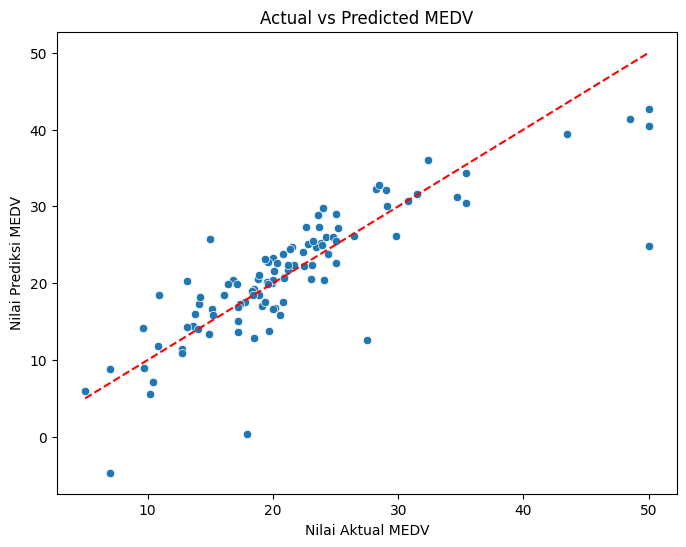

In [332]:
# Visualisasi prediksi vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()

Dengan Log Transformation, MSE sedikit lebih akurat dibanding Yeo-Johnson jika diterapkan pada fitur b, walaupun skewness negatifnya meningkat

#### Box-Cox Transform

In [333]:
# Box-Cox Transform
from scipy.stats import boxcox

df['b_boxcox'], _ = boxcox(df['b'])

# Print skewnewss sebelum transformasi
print("Skewness sebelum transformasi:")
print(df[['crim', 'zn', 'chas', 'b']].skew())

# Print skewness hasil transformasi
print("\nSkewness hasil transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_boxcox']].skew())


Skewness sebelum transformasi:
crim    5.223149
zn      2.225666
chas    3.405904
b      -2.890374
dtype: float64

Skewness hasil transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_boxcox   -1.931635
dtype: float64


In [334]:
# Model
df_model = df.copy()
df_model['b'] = df['b_boxcox']

X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_boxcox', 'b_yj', 'b_log'], axis=1)
y = df_model['medv']


In [335]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,9.053175e+08,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.053175e+08,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,8.717675e+08,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,8.864918e+08,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,9.053175e+08,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,8.649573e+08,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.053175e+08,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,9.053175e+08,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,8.768189e+08,6.48


In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.192671455563104


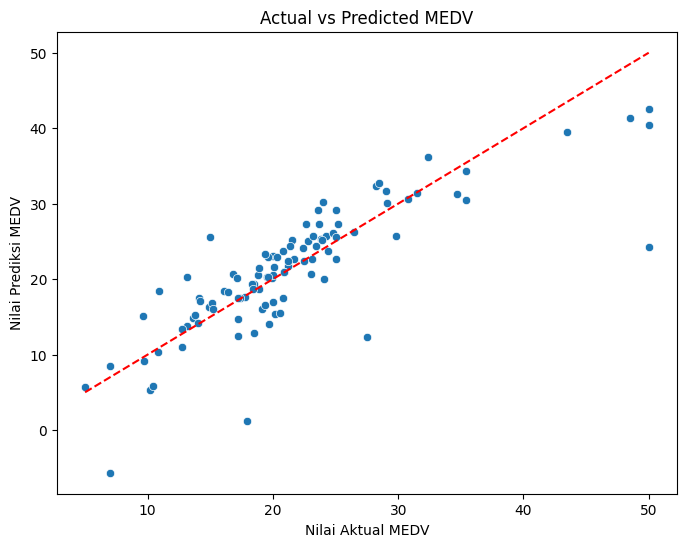

In [337]:
# Visualisasi prediksi vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Dengan Box-Cox Transformation, MSE sedikit lebih akurat dibanding Yeo-Johnson jika diterapkan pada fitur b, dan skewnewssnya juga makin membaik, namun belum sekecil 

#### Quantile Transform

In [338]:
# Quantile Transform
from sklearn.preprocessing import QuantileTransformer

df['b_quantile'] = QuantileTransformer(output_distribution='normal', n_quantiles=500).fit_transform(df[['b']])

# Print skewnewss sebelum transformasi
print("Skewness sebelum transformasi:")
print(df[['crim', 'zn', 'chas', 'b']].skew())

# Print skewness hasil transformasi
print("\nSkewness hasil transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_quantile']].skew())

Skewness sebelum transformasi:
crim    5.223149
zn      2.225666
chas    3.405904
b      -2.890374
dtype: float64

Skewness hasil transformasi:
crim_log      1.269201
zn_log        1.193451
chas_log      3.405904
b_quantile    0.950640
dtype: float64


In [339]:
# Model
df_model = df.copy()
df_model['b'] = df['b_quantile']

X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_quantile', 'b_yj', 'b_log', 'b_boxcox'], axis=1)
y = df_model['medv']


In [340]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,5.199338,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,5.199338,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,0.142365,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,0.383578,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.199338,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,0.036033,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,5.199338,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.199338,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,0.240917,6.48


In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 23.11291382255567


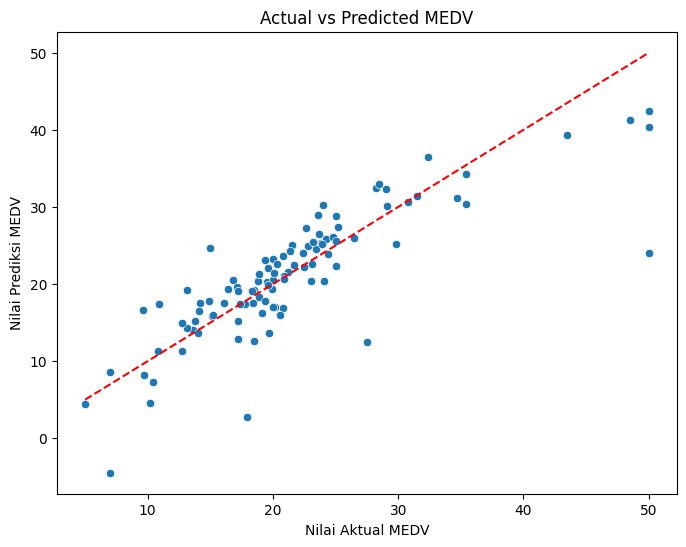

In [342]:
# Visualisasi prediksi vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Dengan Quantile Transform, fitur b menjadi sedikit skew positif, dibanding yang awalnya besar skew negatif, hasil paling akurat ketika menggunakan quantile transform.

# Normalisasi dan Transformasi Data

#### MinMax Scaling

In [343]:
df = pd.read_csv(url)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [344]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

# Semua fitur akan discaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [345]:
X = df_scaled.drop(['medv'], axis=1)
y = df_scaled['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.011995614555542482


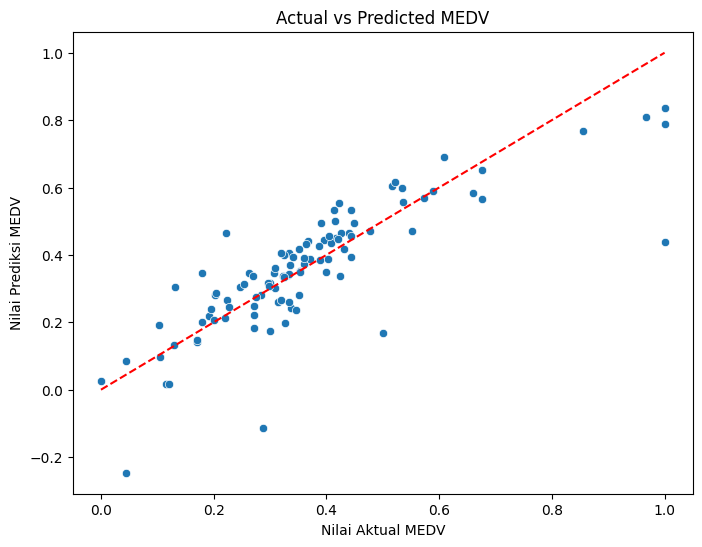

In [346]:
# Visualisasi prediksi vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')


#### Standard Scaling

In [347]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [348]:
X = df_scaled.drop(['medv'], axis=1)
y = df_scaled['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.28774280014026593


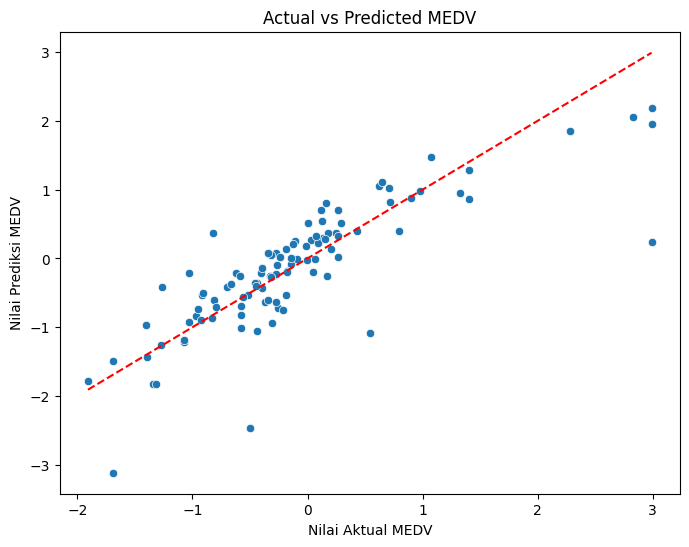

In [349]:
# Visualisasi prediksi vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')



#### Robust Scaling

In [350]:
# Robust Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916,0.150470
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886,-0.075235
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714,0.338558
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756,0.100313


In [351]:
X = df_scaled.drop(['medv'], axis=1)
y = df_scaled['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.38193208753803143


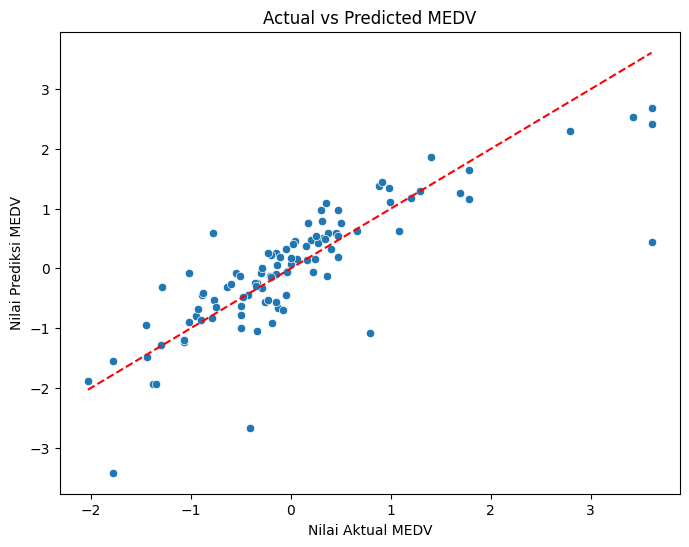

In [352]:
# Visualisasi prediksi vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Discretization pada Fitur Numerik

In [353]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

Semuanya numerik

In [354]:
# Discretization pada Fitur Numerik
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Semua fitur akan di discretize
df_discretized = discretizer.fit_transform(df)
df_discretized = pd.DataFrame(df_discretized, columns=df.columns)
df_discretized

X = df_discretized.drop(['medv'], axis=1)
y = df_discretized['medv']
X


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.0,1.0,0.0,0.0,3.0,5.0,6.0,2.0,0.0,2.0,2.0,9.0,0.0
1,0.0,0.0,2.0,0.0,1.0,5.0,7.0,3.0,0.0,1.0,5.0,9.0,2.0
2,0.0,0.0,2.0,0.0,1.0,6.0,5.0,3.0,0.0,1.0,5.0,9.0,0.0
3,0.0,0.0,0.0,0.0,1.0,6.0,4.0,4.0,0.0,0.0,6.0,9.0,0.0
4,0.0,0.0,0.0,0.0,1.0,6.0,5.0,4.0,0.0,0.0,6.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.0,4.0,0.0,3.0,5.0,6.0,1.0,0.0,1.0,8.0,9.0,2.0
502,0.0,0.0,4.0,0.0,3.0,4.0,7.0,1.0,0.0,1.0,8.0,9.0,2.0
503,0.0,0.0,4.0,0.0,3.0,6.0,9.0,0.0,0.0,1.0,8.0,9.0,1.0
504,0.0,0.0,4.0,0.0,3.0,6.0,8.0,1.0,0.0,1.0,8.0,9.0,1.0


In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1484593948109907


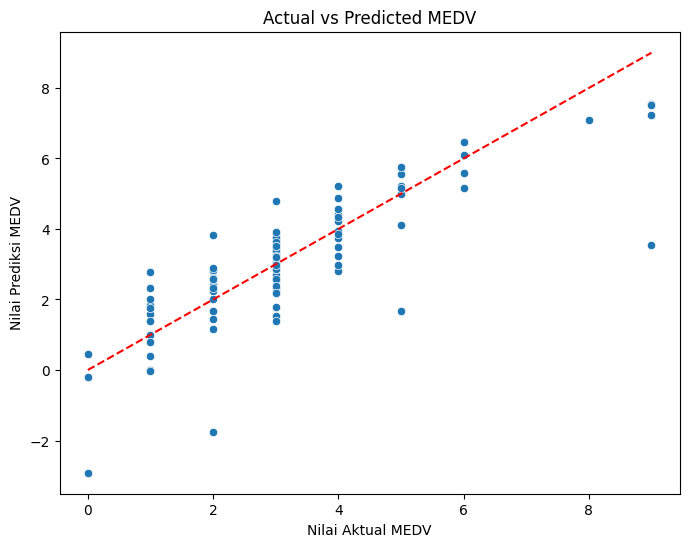

In [356]:
# Visualisasi prediksi vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

Hasil prediksi lebih tidak akurat jika data numerik dijadikan data kategorikal